# Assignment on Titanic dataset to improve the Accuracy

### Importing libraries and Checking the Data.

In [1]:
# Import all the libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from yaml import warnings
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')




In [2]:
# Show maximum columns and rows in the data.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Load the dataset
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_submission = pd.read_csv("gender_submission.csv")

In [4]:
#checking the shape of the dataset
print("Shape of the training dataset:", df_train.shape)
print("Shape of the testing dataset:", df_test.shape)
print("Shape of the submission dataset:", df_submission.shape)

Shape of the training dataset: (891, 12)
Shape of the testing dataset: (418, 11)
Shape of the submission dataset: (418, 2)


In [5]:
# checking the first rows of each dataset
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#now we will remove the target column from train and store it in y, and then we will merge train and test data for further processing.
y = df_train["Survived"]
df_train.drop("Survived", axis = 1, inplace = True)

In [8]:
# reseting the index
y = y.reset_index(drop = True)

#show the data in y column
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [9]:
# create a test copy of the df_test dataframe.
df_test = df_test.copy()

# merge df_train and df_test and create a new column df for further processing
df = pd.concat([df_train, df_test], axis = 0,)

In [10]:
#now we will see how the data in df looks like afer merging.
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Pre-Processing of the Data.

In [11]:
# checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [12]:
#checking for missing values in the data
df.isnull().sum().sort_values(ascending=False)

Cabin          1014
Age             263
Embarked          2
Fare              1
Name              0
PassengerId       0
Pclass            0
Parch             0
SibSp             0
Sex               0
Ticket            0
dtype: int64

In [13]:
#checking the percentage of missing values in the data
((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)

Cabin          77.463713
Age            20.091673
Embarked        0.152788
Fare            0.076394
Name            0.000000
PassengerId     0.000000
Pclass          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Ticket          0.000000
dtype: float64

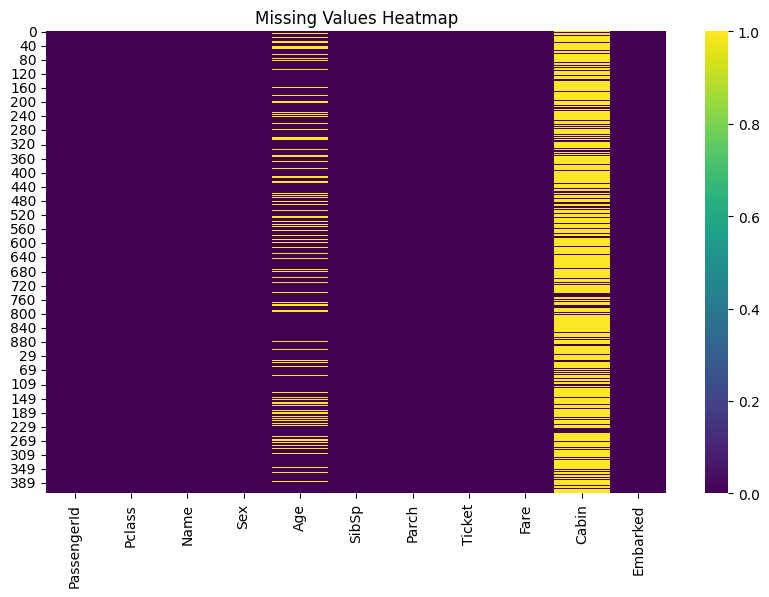

In [14]:
# lets visualize the missing values in the data using heatmap and the colour of the heatmap will be blue.
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar = True, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
# show the data shape
